In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf

from adversarial_attacks import fgsm_attack, pgd_attack
from cnn import load_model
from baselines import evaluate_cnn_across_epsilons, train_denoising_autoencoder

In [2]:
data = loadmat('../data/processed/improved_signals.mat')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
signal2_start_times = data['signal2_start_times'].squeeze()
print(f"Improved Test Set Shape: {X_test.shape}")

Improved Test Set Shape: (5628, 8, 500, 2)


## Define Epsilon Values

In [3]:
epsilon_values_inf = np.linspace(0.0, 0.005, 20)
epsilon_values_l2 = np.linspace(0.0, 0.05, 20)

In [4]:
epsilon_linf = epsilon_values_inf[4]
print(f"Selected epsilon values: Linf = {epsilon_linf}")

Selected epsilon values: Linf = 0.0010526315789473684


In [5]:
epsilon_l2 = epsilon_values_l2[4]
print(f"Selected epsilon values: L2 = {epsilon_l2}")

Selected epsilon values: L2 = 0.010526315789473684


## Auto Encoder

### FGSM Linf Norm

In [6]:
model_dae_fgsm_inf = train_denoising_autoencoder(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_linf,
    norm='inf',
    attack_type='fgsm',
    save_path='../models/attack/dae_fgsm_inf.h5',
    model_name='cnn',
    load_path='../models/noattack',
    epochs=20,
    validation_split=0.1
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 86s 252ms/step - loss: 1.5314e-04 - val_loss: 1.1673e-04
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 82s 243ms/step - loss: 1.1171e-04 - val_loss: 1.0129e-04
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 81s 241ms/step - loss: 9.7513e-05 - val_loss: 8.7535e-05
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 82s 243ms/step - loss: 8.4699e-05 - val_loss: 7.8194e-05
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 79s 233ms/step - loss: 7.5371e-05 - val_loss: 6.6159e-05
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 79s 234ms/step - loss: 6.3283e-05 - val_loss: 5.5971e-05
Epoch 7/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 115s 340ms/step - loss: 5.4082e-05 - val_loss: 4.8645e-05
Epoch 8/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 265ms/step - loss: 4.7642e-05 - val_loss: 4.4788e-05
Epoch 9/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 85s 251ms/step - loss: 4.3744e-05 - val_loss: 4.1794e-05
Epoch 10/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 83s 245ms/step - loss: 4.1348e-05 - val_l

Model loaded from ../models/noattack/cnn.h5
Combined AE + Classifier saved to ../models/attack/dae_fgsm_inf.h5


In [6]:
# Load full DAE + classifier
model_dae_fgsm_inf = load_model('dae_fgsm_inf', load_dir='../models/attack')
model_dae_fgsm_inf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generate FGSM adversarial input (same shape as X_test)
X_test_adv = fgsm_attack(model_dae_fgsm_inf, X_test, y_test, epsilon=epsilon_linf, norm='inf')
if isinstance(X_test_adv, tf.Tensor):
    X_test_adv = X_test_adv.numpy()

Model loaded from ../models/attack/dae_fgsm_inf.h5


In [7]:
# Evaluation with raw shape (8, 500, 2)
_, acc_clean = model_dae_fgsm_inf.evaluate(X_test, y_test, verbose=1)
_, acc_adv = model_dae_fgsm_inf.evaluate(X_test_adv, y_test, verbose=1)
print(f"Stacked model accuracy — Clean: {acc_clean:.4f}, Adversarial: {acc_adv:.4f}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9362 - loss: 0.2832
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4456 - loss: 3.7887
Stacked model accuracy — Clean: 0.9348, Adversarial: 0.4456


### FGSM L2 Norm

In [6]:
model_dae_fgsm_inf = train_denoising_autoencoder(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_linf,
    norm='2',
    attack_type='fgsm',
    save_path='../models/attack/dae_fgsm_l2.h5',
    model_name='cnn',
    load_path='../models/noattack',
    epochs=20,
    validation_split=0.1
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 97s 284ms/step - loss: 1.5314e-04 - val_loss: 1.1624e-04
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 267ms/step - loss: 1.1181e-04 - val_loss: 1.0257e-04
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 265ms/step - loss: 9.8568e-05 - val_loss: 8.9243e-05
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 265ms/step - loss: 8.5492e-05 - val_loss: 7.9068e-05
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - loss: 7.6595e-05 - val_loss: 6.9219e-05
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 185s 547ms/step - loss: 6.6133e-05 - val_loss: 5.8550e-05
Epoch 7/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 266ms/step - loss: 5.5821e-05 - val_loss: 5.0302e-05
Epoch 8/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - loss: 4.8455e-05 - val_loss: 4.5670e-05
Epoch 9/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - loss: 4.4611e-05 - val_loss: 4.2694e-05
Epoch 10/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 265ms/step - loss: 4.1757e-05 - val_l

Model loaded from ../models/noattack/cnn.h5
Combined AE + Classifier saved to ../models/attack/dae_fgsm_l2.h5


In [8]:
# Load full DAE + classifier
model_dae_fgsm_l2 = load_model('dae_fgsm_l2', load_dir='../models/attack')
model_dae_fgsm_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_test_adv = fgsm_attack(model_dae_fgsm_l2, X_test, y_test, epsilon=epsilon_linf, norm='2')
if isinstance(X_test_adv, tf.Tensor):
    X_test_adv = X_test_adv.numpy()

Model loaded from ../models/attack/dae_fgsm_l2.h5


In [9]:
# Evaluation
_, acc_clean = model_dae_fgsm_l2.evaluate(X_test, y_test, verbose=1)
_, acc_adv = model_dae_fgsm_l2.evaluate(X_test_adv, y_test, verbose=1)
print(f"Stacked model accuracy — Clean: {acc_clean:.4f}, Adversarial: {acc_adv:.4f}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9442 - loss: 0.2394
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9407 - loss: 0.2645
Stacked model accuracy — Clean: 0.9428, Adversarial: 0.9385


### PGD Linf Norm

In [10]:
model_dae_fgsm_inf = train_denoising_autoencoder(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_linf,
    norm='inf',
    attack_type='pgd',
    save_path='../models/attack/dae_pgd_inf.h5',
    model_name='cnn',
    load_path='../models/noattack',
    epochs=20,
    validation_split=0.1
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 93s 273ms/step - loss: 1.4939e-04 - val_loss: 1.1514e-04
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 91s 268ms/step - loss: 1.1022e-04 - val_loss: 1.0001e-04
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 91s 270ms/step - loss: 9.5255e-05 - val_loss: 8.5103e-05
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 261ms/step - loss: 8.2068e-05 - val_loss: 7.4525e-05
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 261ms/step - loss: 7.1078e-05 - val_loss: 6.2306e-05
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 155s 460ms/step - loss: 5.9187e-05 - val_loss: 5.1451e-05
Epoch 7/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 262ms/step - loss: 4.9790e-05 - val_loss: 4.6040e-05
Epoch 8/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 266ms/step - loss: 4.4938e-05 - val_loss: 4.2638e-05
Epoch 9/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 262ms/step - loss: 4.1960e-05 - val_loss: 4.0483e-05
Epoch 10/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 261ms/step - loss: 4.0060e-05 - val_l

Model loaded from ../models/noattack/cnn.h5
Combined AE + Classifier saved to ../models/attack/dae_pgd_inf.h5


In [11]:
# Load full DAE + classifier
model_dae_pgd_inf = load_model('dae_pgd_inf', load_dir='../models/attack')
model_dae_pgd_inf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_test_adv = pgd_attack(model_dae_pgd_inf, X_test, y_test, epsilon=epsilon_linf, norm='inf')
if isinstance(X_test_adv, tf.Tensor):
    X_test_adv = X_test_adv.numpy()

Model loaded from ../models/attack/dae_pgd_inf.h5


In [12]:
# Evaluation
_, acc_clean = model_dae_pgd_inf.evaluate(X_test, y_test, verbose=1)
_, acc_adv = model_dae_pgd_inf.evaluate(X_test_adv, y_test, verbose=1)
print(f"Stacked model accuracy — Clean: {acc_clean:.4f}, Adversarial: {acc_adv:.4f}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9408 - loss: 0.2322
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2484 - loss: 6.2848
Stacked model accuracy — Clean: 0.9403, Adversarial: 0.2521


### PGD L2 Norm

In [13]:
model_dae_fgsm_inf = train_denoising_autoencoder(
    X_train=X_train,
    y_train=y_train,
    epsilon=epsilon_linf,
    norm='2',
    attack_type='pgd',
    save_path='../models/attack/dae_pgd_l2.h5',
    model_name='cnn',
    load_path='../models/noattack',
    epochs=20,
    validation_split=0.1
)

Model loaded from ../models/noattack/cnn.h5
Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 95s 276ms/step - loss: 1.5552e-04 - val_loss: 1.1809e-04
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 91s 270ms/step - loss: 1.1282e-04 - val_loss: 1.0257e-04
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 267ms/step - loss: 9.8661e-05 - val_loss: 8.8848e-05
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 92s 271ms/step - loss: 8.6011e-05 - val_loss: 8.0049e-05
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - loss: 7.7281e-05 - val_loss: 7.1202e-05
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - loss: 6.8486e-05 - val_loss: 6.1235e-05
Epoch 7/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 265ms/step - loss: 5.7798e-05 - val_loss: 5.1173e-05
Epoch 8/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 266ms/step - loss: 4.9216e-05 - val_loss: 4.5519e-05
Epoch 9/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 265ms/step - loss: 4.4185e-05 - val_loss: 4.2284e-05
Epoch 10/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 89s 264ms/step - loss: 4.1284e-05 - val_lo

Model loaded from ../models/noattack/cnn.h5
Combined AE + Classifier saved to ../models/attack/dae_pgd_l2.h5


In [14]:
# Load full DAE + classifier
model_dae_pgd_l2 = load_model('dae_pgd_l2', load_dir='../models/attack')
model_dae_pgd_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_test_adv = pgd_attack(model_dae_pgd_l2, X_test, y_test, epsilon=epsilon_l2, norm='2')
if isinstance(X_test_adv, tf.Tensor):
    X_test_adv = X_test_adv.numpy()

Model loaded from ../models/attack/dae_pgd_l2.h5


In [15]:
# Evaluation
_, acc_clean = model_dae_pgd_l2.evaluate(X_test, y_test, verbose=1)
_, acc_adv = model_dae_pgd_l2.evaluate(X_test_adv, y_test, verbose=1)
print(f"Stacked model accuracy — Clean: {acc_clean:.4f}, Adversarial: {acc_adv:.4f}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9392 - loss: 0.2658
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8766 - loss: 0.6306
Stacked model accuracy — Clean: 0.9346, Adversarial: 0.8710


## Evaluate and Compare Results

In [16]:
fgsm_inf = pd.read_csv('../results/improved_attacks/fgsm_inf_accuracy.csv')
pgd_inf = pd.read_csv('../results/improved_attacks/pgd_inf_accuracy.csv')
fgsm_l2 = pd.read_csv('../results/improved_attacks/fgsm_l2_accuracy.csv')
pgd_l2 = pd.read_csv('../results/improved_attacks/pgd_l2_accuracy.csv')

In [17]:
# dae training
acc_dae_fgsm_inf, preds_dae_fgsm_inf = evaluate_cnn_across_epsilons(
    model_dae_fgsm_inf, X_test, y_test,
    epsilon_values_inf, attack_type='fgsm', norm='inf'
)

[FGSM-inf] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[FGSM-inf] Epsilon = 0.00026
Mean absolute perturbation at epsilon=0.00026: 0.000263
[FGSM-inf] Epsilon = 0.00053
Mean absolute perturbation at epsilon=0.00053: 0.000526
[FGSM-inf] Epsilon = 0.00079
Mean absolute perturbation at epsilon=0.00079: 0.000789
[FGSM-inf] Epsilon = 0.00105
Mean absolute perturbation at epsilon=0.00105: 0.001053
[FGSM-inf] Epsilon = 0.00132
Mean absolute perturbation at epsilon=0.00132: 0.001316
[FGSM-inf] Epsilon = 0.00158
Mean absolute perturbation at epsilon=0.00158: 0.001579
[FGSM-inf] Epsilon = 0.00184
Mean absolute perturbation at epsilon=0.00184: 0.001842
[FGSM-inf] Epsilon = 0.00211
Mean absolute perturbation at epsilon=0.00211: 0.002105
[FGSM-inf] Epsilon = 0.00237
Mean absolute perturbation at epsilon=0.00237: 0.002368
[FGSM-inf] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.002631
[FGSM-inf] Epsilon = 0.00289
Mean absolute perturbation at epsilo

In [18]:
fgsm_inf['dae_trained'] = acc_dae_fgsm_inf

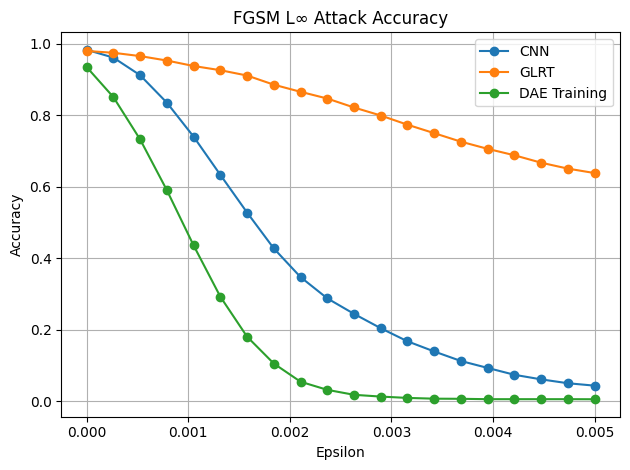

In [19]:
fgsm_inf.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "dae_trained"],
    marker='o'
)

plt.title("FGSM L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "DAE Training"])
plt.tight_layout()
plt.show()

In [29]:
fgsm_inf.to_csv('../results/baseline/fgsm_inf_accuracy_with_dae.csv', index=False)

In [20]:
# dae training
acc_dae_fgsm_l2, preds_dae_fgsm_l2 = evaluate_cnn_across_epsilons(
    model_dae_fgsm_l2, X_test, y_test,
    epsilon_values_l2, attack_type='fgsm', norm='2'
)

[FGSM-2] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[FGSM-2] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.000013
[FGSM-2] Epsilon = 0.00526
Mean absolute perturbation at epsilon=0.00526: 0.000025
[FGSM-2] Epsilon = 0.00789
Mean absolute perturbation at epsilon=0.00789: 0.000038
[FGSM-2] Epsilon = 0.01053
Mean absolute perturbation at epsilon=0.01053: 0.000050
[FGSM-2] Epsilon = 0.01316
Mean absolute perturbation at epsilon=0.01316: 0.000063
[FGSM-2] Epsilon = 0.01579
Mean absolute perturbation at epsilon=0.01579: 0.000075
[FGSM-2] Epsilon = 0.01842
Mean absolute perturbation at epsilon=0.01842: 0.000088
[FGSM-2] Epsilon = 0.02105
Mean absolute perturbation at epsilon=0.02105: 0.000101
[FGSM-2] Epsilon = 0.02368
Mean absolute perturbation at epsilon=0.02368: 0.000113
[FGSM-2] Epsilon = 0.02632
Mean absolute perturbation at epsilon=0.02632: 0.000126
[FGSM-2] Epsilon = 0.02895
Mean absolute perturbation at epsilon=0.02895: 0.000138
[FGS

In [21]:
fgsm_l2['dae_trained'] = acc_dae_fgsm_l2

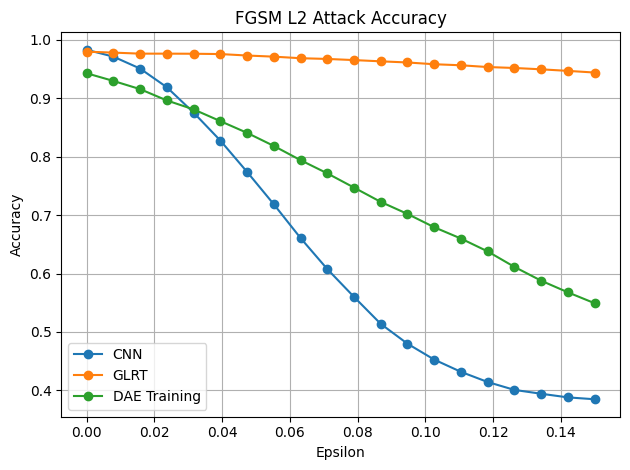

In [22]:
fgsm_l2.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "dae_trained"],
    marker='o'
)

plt.title("FGSM L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "DAE Training"])
plt.tight_layout()
plt.show()

In [30]:
fgsm_l2.to_csv('../results/baseline/fgsm_l2_accuracy_with_dae.csv', index=False)

In [23]:
# distillation
acc_dae_pgd_inf, preds_dae_pgd_inf = evaluate_cnn_across_epsilons(
    model_dae_pgd_inf, X_test, y_test,
    epsilon_values_inf, attack_type='pgd', norm='inf'
)

[PGD-inf] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[PGD-inf] Epsilon = 0.00026
Mean absolute perturbation at epsilon=0.00026: 0.000233
[PGD-inf] Epsilon = 0.00053
Mean absolute perturbation at epsilon=0.00053: 0.000436
[PGD-inf] Epsilon = 0.00079
Mean absolute perturbation at epsilon=0.00079: 0.000618
[PGD-inf] Epsilon = 0.00105
Mean absolute perturbation at epsilon=0.00105: 0.000786
[PGD-inf] Epsilon = 0.00132
Mean absolute perturbation at epsilon=0.00132: 0.000943
[PGD-inf] Epsilon = 0.00158
Mean absolute perturbation at epsilon=0.00158: 0.001094
[PGD-inf] Epsilon = 0.00184
Mean absolute perturbation at epsilon=0.00184: 0.001240
[PGD-inf] Epsilon = 0.00211
Mean absolute perturbation at epsilon=0.00211: 0.001383
[PGD-inf] Epsilon = 0.00237
Mean absolute perturbation at epsilon=0.00237: 0.001525
[PGD-inf] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.001665
[PGD-inf] Epsilon = 0.00289
Mean absolute perturbation at epsilon=0.00289: 0

In [24]:
pgd_inf['dae_trained'] = acc_dae_pgd_inf

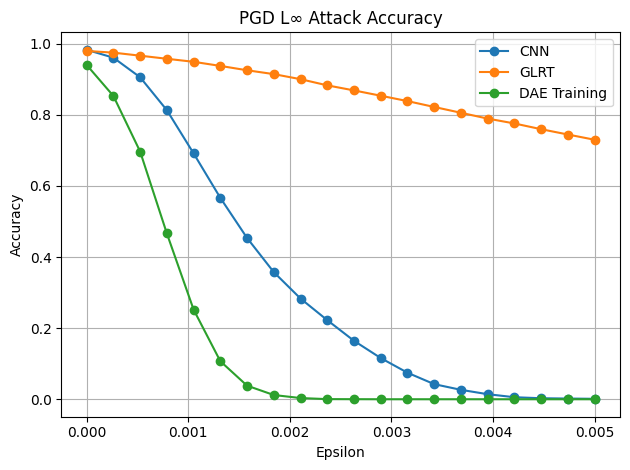

In [25]:
pgd_inf.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "dae_trained"],
    marker='o'
)

plt.title("PGD L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "DAE Training"])
plt.tight_layout()
plt.show()
# white box attack which means we're attacking the dae + cnn together, overparameterized model compared to
# cnn. overparameterized model amplifies the attack, lower potency.

In [31]:
pgd_inf.to_csv('../results/baseline/pgd_inf_accuracy_with_dae.csv', index=False)

In [26]:
# distillation
acc_dae_pgd_l2, preds_dae_pgd_l2 = evaluate_cnn_across_epsilons(
    model_dae_pgd_l2, X_test, y_test,
    epsilon_values_l2, attack_type='pgd', norm='2'
)

[PGD-2] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[PGD-2] Epsilon = 0.00263
Mean absolute perturbation at epsilon=0.00263: 0.000013
[PGD-2] Epsilon = 0.00526
Mean absolute perturbation at epsilon=0.00526: 0.000026
[PGD-2] Epsilon = 0.00789
Mean absolute perturbation at epsilon=0.00789: 0.000038
[PGD-2] Epsilon = 0.01053
Mean absolute perturbation at epsilon=0.01053: 0.000051
[PGD-2] Epsilon = 0.01316
Mean absolute perturbation at epsilon=0.01316: 0.000064
[PGD-2] Epsilon = 0.01579
Mean absolute perturbation at epsilon=0.01579: 0.000077
[PGD-2] Epsilon = 0.01842
Mean absolute perturbation at epsilon=0.01842: 0.000090
[PGD-2] Epsilon = 0.02105
Mean absolute perturbation at epsilon=0.02105: 0.000102
[PGD-2] Epsilon = 0.02368
Mean absolute perturbation at epsilon=0.02368: 0.000115
[PGD-2] Epsilon = 0.02632
Mean absolute perturbation at epsilon=0.02632: 0.000127
[PGD-2] Epsilon = 0.02895
Mean absolute perturbation at epsilon=0.02895: 0.000140
[PGD-2] Epsilon 

In [27]:
pgd_l2['dae_trained'] = acc_dae_pgd_l2

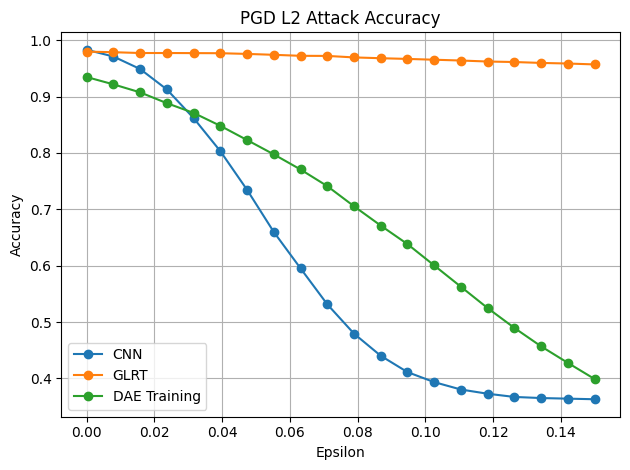

In [28]:
pgd_l2.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "dae_trained"],
    marker='o'
)

plt.title("PGD L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "DAE Training"])
plt.tight_layout()
plt.show()

In [32]:
pgd_l2.to_csv('../results/baseline/pgd_l2_accuracy_with_dae.csv', index=False)